# Ranking of classifiers as a meta-learning problem

### AutoDL predictions dataset

* 13 algorithms (lines)
* 66 datasets (columns)

Ground truth is in **reference** folder <br />
Information about models and datasets is in **metadata** folder

frequency_wins -> success_rate

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.append('../../ranky') # ranking module
import ranky as rk
from glob import glob
import yaml
import itertools as it

# All functions used in this notebook
from utilities import *

# Experimental setting

In [2]:
# Baselines
def exaequo(m, axis=1):
    """ Gives the same score to all candidates.
    
        Args:
          axis: Judge axis.
    """
    m = np.array(m)
    # TODO: include in ranky and clean
    return pd.Series(np.zeros(m.shape[1 - axis]))

In [3]:
methods = ['Random', 'Mean', 'Median', 'Average rank', "Copeland's method", 'Relative difference'] #  'Success rate',
ranking_methods = [rk.dictator, rk.score, rk.majority, rk.borda, rk.pairwise, rk.pairwise] # , rk.condorcet
kw_list = [{}, {}, {}, {'reverse' : True}, {'wins' : rk.copeland_wins}, {'wins' : rk.relative_difference}] # , {'wins' : rk.success_rate}

In [4]:
folder = '../data/'

# load from CSV files
def load_da(name):
    return pd.read_csv(os.path.join(folder, name+'.data'), sep=' ', header=None).T

da_names = ['AutoDL-AUC', 'AutoDL-ALC', 'AutoML', 'Artificial', 'OpenML', 'Statlog']
da_matrices = [load_da(name) for name in da_names]

# Generalization

In [5]:
n = 10000 #10000 # number of bootstraps

### * Judge perturbation

##### Ranking (Spearman)

In [6]:
# Compute
all_gen = []
for i in range(len(da_names)):
    print(da_names[i])
    gen = bootstrap_generalization(da_matrices[i], ranking_methods, kw_list, methods, 'spearman', axis=1, n=n)
    all_gen.append(gen)

AutoDL-AUC


/home/adrien/.local/lib/python3.10/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


AutoDL-ALC
AutoML
Artificial
OpenML
Statlog


In [7]:
# Save
all_gen = concat([x.T for x in all_gen], da_names)
all_gen.to_csv(os.path.join(folder, 'results', 'generalization_judge_ranking.csv'))

##### Winner (Winner distance)

In [8]:
# Compute
all_gen = []
for i in range(len(da_names)):
    print(da_names[i])
    gen = bootstrap_generalization(da_matrices[i], ranking_methods, kw_list, methods, 'winner_distance', axis=1, n=n)
    all_gen.append(gen)

AutoDL-AUC
AutoDL-ALC
AutoML
Artificial
OpenML
Statlog


In [9]:
# Save
all_gen = concat([x.T for x in all_gen], da_names)
all_gen.to_csv(os.path.join(folder, 'results', 'generalization_judge_winner.csv'))

### * With candidate perturbation

##### Ranking

In [ ]:
# Compute
all_gen = []
for i in range(len(da_names)):
    print(da_names[i])
    gen = bootstrap_generalization(da_matrices[i], ranking_methods, kw_list, methods, 'spearman', axis=1, n=n, candidate_perturbation=True)
    all_gen.append(gen)

AutoDL-AUC
AutoDL-ALC
AutoML
Artificial
OpenML


In [ ]:
# Save
all_gen = concat([x.T for x in all_gen], da_names)
all_gen.to_csv(os.path.join(folder, 'results', 'generalization_candidate_ranking.csv'))

##### Winner

In [ ]:
# Compute
all_gen = []
for i in range(len(da_names)):
    print(da_names[i])
    gen = bootstrap_generalization(da_matrices[i], ranking_methods, kw_list, methods, 'winner_distance', axis=1, n=n, candidate_perturbation=True)
    all_gen.append(gen)

In [ ]:
# Save
all_gen = concat([x.T for x in all_gen], da_names)
all_gen.to_csv(os.path.join(folder, 'results', 'generalization_candidate_winner.csv'))

# Stability

### * Judge perturbation

In [ ]:
n = 100 #100 # number of bootstrap when computing stability
n2 = 10 #10 # number of trials to compute standard deviation

##### Ranking

In [ ]:
# Compute

all_robs = []
for i in range(len(da_matrices)):
    robustness = pd.DataFrame()
    print(da_names[i])
    trials = []
    for j in range(n2):
        # compute Kendall W
        robs, _ = robustness_task(da_matrices[i], ranking_methods, kw_list, n=n) # metric='spearman'
        trials.append(robs)
    robs = pd.DataFrame(trials).T
    robs.index = methods
    all_robs.append(robs)

In [ ]:
# Save
all_robs = concat([x for x in all_robs], da_names)
all_robs.to_csv(os.path.join(folder, 'results', 'stability_judge_ranking.csv'))

##### Winner

In [ ]:
# Compute
#all_robs = []
#for i in range(len(da_matrices)):
#    robustness = pd.DataFrame()
#    print(da_names[i])
#    trials = []
#    for j in range(n2):
#        robs, _ = robustness_task(da_matrices[i], ranking_methods, kw_list, n=n, metric='symmetrical_winner_distance')
#        trials.append(robs)
#    robs = pd.DataFrame(trials).T
#    robs.index = methods
#    all_robs.append(robs)

In [ ]:
# Save
#all_robs = concat([x for x in all_robs], da_names)
#all_robs.to_csv(os.path.join(folder, 'results', 'stability_judge_winner.csv'))

### * Candidate perturbation

##### Ranking

In [ ]:
# Compute
all_robs = []
for i in range(len(da_matrices)):
    robustness = pd.DataFrame()
    print(da_names[i])
    trials = []
    for j in range(n2):
        # compute Kendall W
        robs, _ = robustness_candidates(da_matrices[i], ranking_methods, kw_list, n=n, metric='spearman')
        trials.append(robs)
    robs = pd.DataFrame(trials).T
    robs.index = methods
    all_robs.append(robs)

In [ ]:
# Save
all_robs = concat([x for x in all_robs], da_names)
all_robs.to_csv(os.path.join(folder, 'results', 'stability_candidate_ranking.csv'))

##### Winner

In [ ]:
# Compute
#all_robs = []
#for i in range(len(da_matrices)):
#    robustness = pd.DataFrame()
#    print(da_names[i])
#    trials = []
#    for j in range(n2):
#        # compute Kendall W
#        robs, _ = robustness_candidates(da_matrices[i], ranking_methods, kw_list, n=n, metric='symmetrical_winner_distance', winner=True)
#        trials.append(robs)
#    robs = pd.DataFrame(trials).T
#    robs.index = methods
#    all_robs.append(robs)

In [ ]:
# Save
#all_robs = concat([x for x in all_robs], da_names)
#all_robs.to_csv(os.path.join(folder, 'results', 'stability_candidate_winner.csv'))

# Condorcet Winner

In [ ]:
def condorcet_winner(m):
    """ True is there is a Condorcet winner.
    
        Judges are in columns.
    """
    cw = m.shape[0] - 1 # number of wins needed
    return cw in list(rk.condorcet(m))

# Tests
#m1 = pd.DataFrame([[1, 0.9, 1], [1, 0, 0.5], [0.5, 1, 0]]) 
#m2 = pd.DataFrame([[0, 0.5, 1], [1, 0, 0.5], [0.5, 1, 0]]) # cycle
#condorcet_winner(m1)
#condorcet_winner(m2)

In [71]:
#for da in da_matrices:
#    print(condorcet_winner(da))

In [ ]:
n = 30000 # number of trials

##### Average rank of winner

In [ ]:
def winner_avr(m, ranking_functions, kw_list, n=100):
    """ Rate of Condorcet winner elected on n bootstraps.
    """
    res = []
    for _ in range(n): # number of bootstraps
        new_da = rk.bootstrap(m, axis=1)
        new_da = rk.bootstrap(m, axis=0)
        row = []
        for i, ranking_function in enumerate(ranking_functions):
            #w = np.argmax(ranking_function(new_da, **kw_list[i]))
            w = ranking_function(new_da, **kw_list[i]).idxmax()
            avw = (1 - ((rk.borda(new_da) - 1) / (new_da.shape[0] - 1)))[w]
            if isinstance(avw, pd.Series):
                avw = avw.unique()[0]
            row.append(avw)
        res.append(row)
    res = pd.DataFrame(res).T
    if len(res) > 0:
        res.index = methods
    return res

In [ ]:
# Compute
rates = []
for i in range(len(da_matrices)):
    print(da_names[i])
    da = da_matrices[i]
    rates.append(winner_avr(da, ranking_methods, kw_list, n=n))

In [ ]:
# Save
rates = concat([x for x in rates], da_names)
rates.to_csv(os.path.join(folder, 'results', 'avr_winner.csv'))

##### Rate of Condorcet winner elected

In [ ]:
def condorcet_rate(m, ranking_functions, kw_list, n=100):
    """ Rate of Condorcet winner elected on n bootstraps.
    """
    res = []
    condorcet_count = 0
    for _ in range(n): # number of bootstraps
        new_da = rk.bootstrap(m, axis=1)
        new_da = rk.bootstrap(m, axis=0)
        if condorcet_winner(new_da): # TODO: rate of presence of a Condorcet winner?
            condorcet_count += 1
            #cw = np.argmax(rk.condorcet(new_da))
            cw = rk.condorcet(new_da).idxmax()
            row = []
            for i, ranking_function in enumerate(ranking_functions):
                #w = np.argmax(ranking_function(new_da, **kw_list[i]))
                w = ranking_function(new_da, **kw_list[i]).idxmax()
                row.append(cw == w)
            res.append(row)
    res = pd.DataFrame(res).T
    if len(res) > 0:
        res.index = methods
    print('Condorcet count: {}'.format(condorcet_count / n))
    return res

In [ ]:
# Compute
rates = []
for i in range(len(da_matrices)):
    print(da_names[i])
    da = da_matrices[i]
    rates.append(condorcet_rate(da, ranking_methods, kw_list, n=n))

In [ ]:
# Save
rates = concat([x for x in rates], da_names)
rates.to_csv(os.path.join(folder, 'results', 'condorcet_winner_rate.csv'))

##### Rate of Majority winner elected

In [ ]:
def majority_winner(m):
    """ True is there is a Majority winner.
    
        Judges are in columns.
    """
    mw = m[(rk.rank(m) == 1).mean(axis=1) > 0.5]
    if len(mw.index) > 1:
        print('This is impossible.')
    return len(mw.index) > 0

# Tests
#m1 = pd.DataFrame([[1, 0.9, 1], [1, 0, 0.5], [0.5, 1, 0]]) 
#m2 = pd.DataFrame([[0.7, 0, 0.5], [0.5, 0.9, 0], [1, 1, 1]])
#majority_winner(m1)
#majority_winner(m2)

In [ ]:
def majority_rate(m, ranking_functions, kw_list, n=100):
    """ Rate of Condorcet winner elected on n bootstraps.
    """
    res = []
    majority_count = 0
    for _ in range(n): # number of bootstraps
        new_da = rk.bootstrap(m, axis=1)
        new_da = rk.bootstrap(m, axis=0)
        if majority_winner(new_da): # TODO idem, rate of majority winner ?
            majority_count += 1
            #cw = np.argmax(rk.majority(new_da))
            #cw = rk.majority(new_da).idxmax()
            cw = new_da[(rk.rank(new_da) == 1).mean(axis=1) > 0.5].index[0]
            row = []
            for i, ranking_function in enumerate(ranking_functions):
                #w = np.argmax(ranking_function(new_da, **kw_list[i]))
                w = ranking_function(new_da, **kw_list[i]).idxmax()
                row.append(cw == w)
            res.append(row)
    res = pd.DataFrame(res).T
    if len(res) > 0:
        res.index = methods
    print('Majority count: {}'.format(majority_count / n))
    return res

In [ ]:
# Compute
#rates = []
#for i in range(len(da_matrices)):
#    print(da_names[i])
#    da = da_matrices[i]
#    rates.append(majority_rate(da, ranking_methods, kw_list, n=n))

In [ ]:
# Save
rates = concat([x for x in rates], da_names)
rates.to_csv(os.path.join(folder, 'results', 'majority_winner_rate.csv'))

# Matrix concordance

Re-compute with pairwise correlation

In [91]:
for i in range(len(da_names)):
    print(da_names[i])
    print(np.round(rk.kendall_w_ties(np.array(da_matrices[i]), axis=1), 2))

AutoDL-AUC
0.38
AutoDL-ALC
0.6
AutoML
0.27
Artificial
0.0
OpenML
0.32
Statlog
0.27


In [92]:
for i in range(len(da_names)):
    print(da_names[i])
    print(np.round(rk.concordance(np.array(da_matrices[i]), axis=1), 2))

AutoDL-AUC
nan
AutoDL-ALC
0.6
AutoML
0.25
Artificial
-0.02
OpenML
0.31
Statlog
0.23


# Artificial matrices

In [ ]:
def generate_matrix(n, m, tau):
    eps = np.finfo(float).eps
    r = min(m, n)
    U = np.random.uniform(size=(n, r))
    A = [np.exp(-t / (tau + eps)) for t in range(r)]
    A = np.diag(A)
    #print(A)
    V = np.random.uniform(size=(m, r))
    M = np.matmul(np.matmul(U, A), V.T)
    return M

In [ ]:
def generate_matrix_bis(U, V, tau, r=10):
    eps = np.finfo(float).eps
    A = [np.exp(-t / (tau + eps)) for t in range(r)]
    A = np.diag(A)
    #print(A)
    M = np.matmul(np.matmul(U, A), V.T)
    #M = M + np.random.uniform(size=(10, 15), high=0.1)
    return M

In [ ]:
#U = np.random.uniform(size=(10, 10))
#V = np.random.uniform(size=(15, 10))

x = np.arange(0, 2, 0.05)
y = [rk.kendall_w(generate_matrix_bis(U, V, tau)) for tau in x]
plt.plot(x, y)
plt.xlabel('tau')
plt.ylabel('kendall W')

In [ ]:
ys = []
for tau in x:
    m = generate_matrix_bis(U, V, tau)
    b = bootstrap_generalization(m, ranking_methods, kw_list, methods, 'spearman', n=10, axis=1)
    b = b.mean(axis=0)
    b = b.drop(['Ex Aequo'], axis=0)
    ys.append(b)
ys = np.array(ys).T
for i, y in enumerate(ys):
    plt.plot(x, y, label=b.index[i])
plt.legend()

In [ ]:
# sns clustermap m

# Multidimensional scale plots

In [95]:
def compute_all_rankings(m):
    rm = pd.DataFrame()
    #rm['Ex Aequo'] = rk.rank(exaequo(m))
    #rm['Random'] = rk.rank(rk.dictator(m))
    rm['Mean'] = rk.rank(rk.score(m))
    rm['Median'] = rk.rank(rk.majority(m))
    rm['Average rank'] = rk.rank(rk.borda(m), reverse=True)
    rm['Success rate'] = rk.rank(rk.condorcet(m, wins=rk.success_rate))
    rm['Relative difference'] = rk.rank(rk.condorcet(m, wins=rk.relative_difference, score=True))
    rm["Copeland's method"] = rk.rank(rk.condorcet(m))
    return rm

In [96]:
cat = {0 : 'Classical', 1 : 'Pairwise', 2 : 'ORA'}
c = [cat[n] for n in [0, 0, 2, 1, 1]]

In [97]:
#rk.show(rm, annot=True, size=1)
# Also we can do a bar plot with the ranking of each methods with different colors

In [98]:
all_rm = [compute_all_rankings(da_matrix) for da_matrix in da_matrices]
all_dist = [rk.distance_matrix(rm, method='spearman', axis=1) for rm in all_rm]
names = all_dist[0].columns
mean_dist = np.array(all_dist).mean(axis=0)
mean_dist = pd.DataFrame(mean_dist, index=names, columns=names)

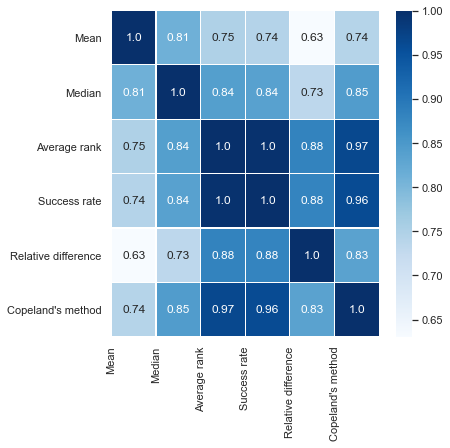

In [108]:
rk.show(mean_dist, annot=True, size=1, cmap='Blues')

In [123]:
cm = sns.light_palette((0.59, 0.6, 0.88), as_cmap=True)
mean_dist.columns = ['Mean', 'Median', 'Av. rank', 'Suc. rate', 'Rel. diff.', 'Copel.']
mean_dist.index = ['Mean', 'Median', 'Average rank', 'Success rate', 'Relative difference', 'Copeland']
mean_dist.style.background_gradient(cmap=cm).set_precision(2)

,Mean,Median,Av. rank,Suc. rate,Rel. diff.,Copel.
Mean,1.00,0.81,0.75,0.74,0.63,0.74
Median,0.81,1.00,0.84,0.84,0.73,0.85
Average rank,0.75,0.84,1.00,1.00,0.88,0.97
Success rate,0.74,0.84,1.00,1.00,0.88,0.96
Relative difference,0.63,0.73,0.88,0.88,1.00,0.83
Copeland,0.74,0.85,0.97,0.96,0.83,1.00


/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


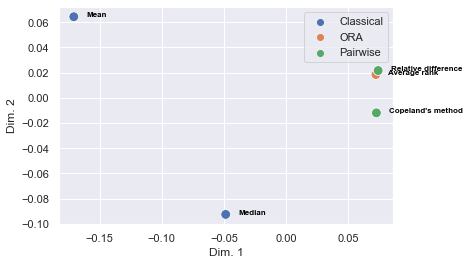

In [78]:
plt.xlabel('Dim. 1')
plt.ylabel('Dim. 2')
rk.mds_from_dist_matrix(1 - mean_dist, big_display=False, colors=c, legend=True, fontsize=8, pointsize=95)

# Some plots

AutoDL-AUC
AutoDL-ALC
AutoML
Artificial
OpenML
Statlog


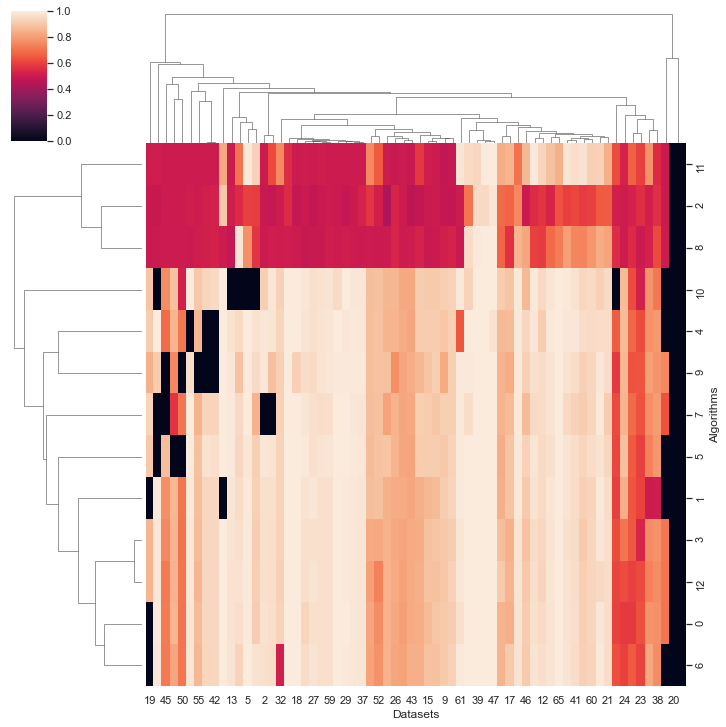

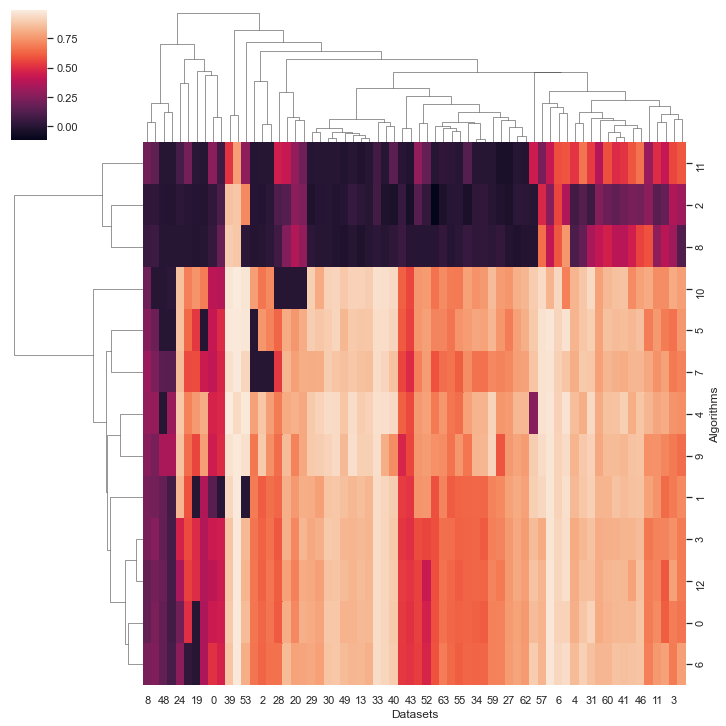

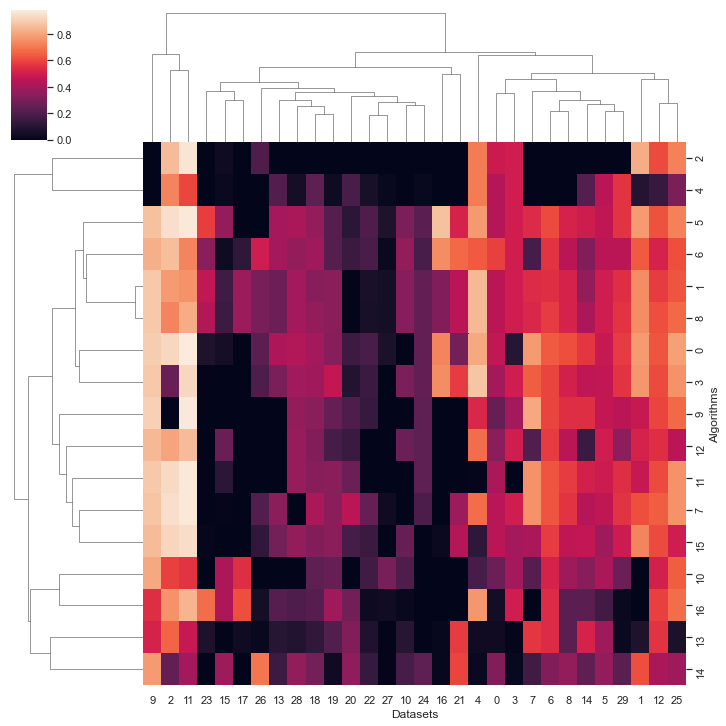

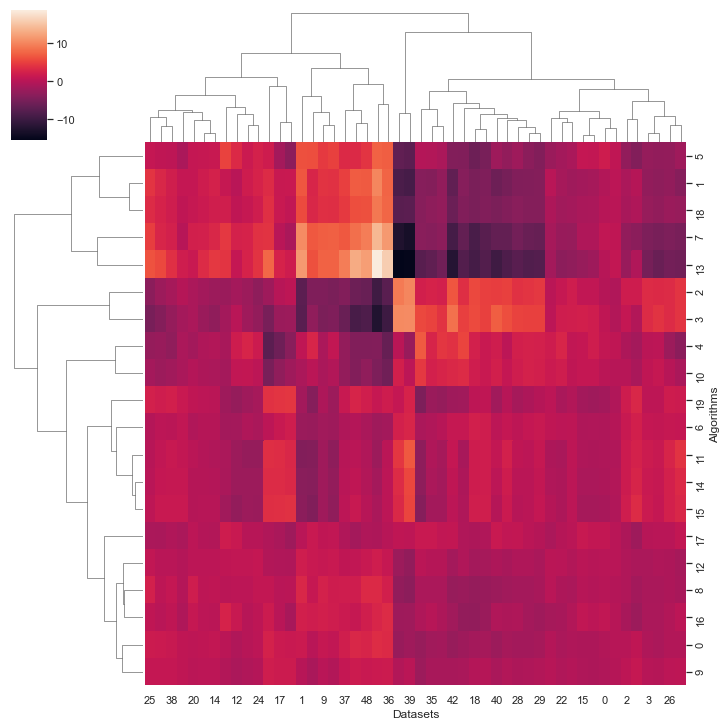

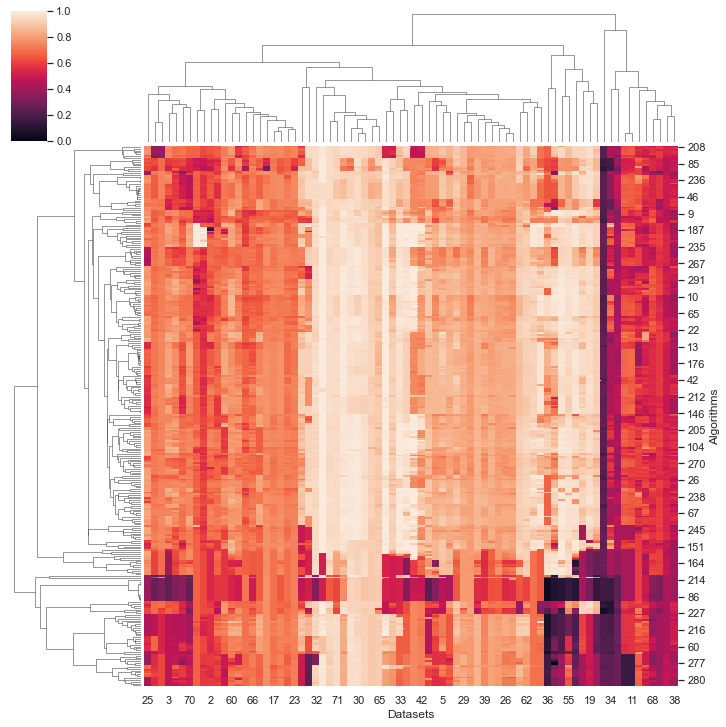

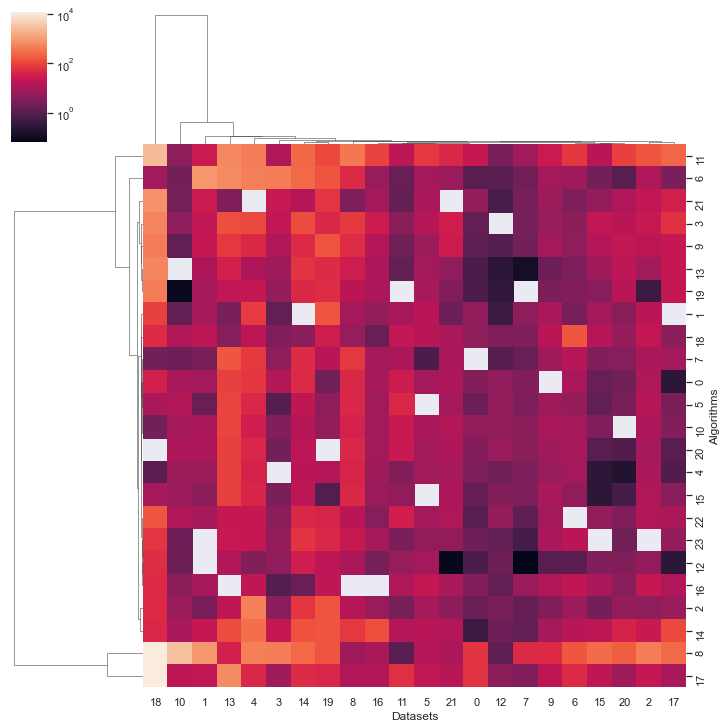

In [130]:
from matplotlib.colors import LogNorm
for i in range(len(da_names)):
    print(da_names[i])
    if da_names[i] == 'Statlog':
        g = sns.clustermap(da_matrices[i], norm=LogNorm())
    else:
        g = sns.clustermap(da_matrices[i])
    g.ax_heatmap.set_xlabel('Datasets', rotation=0)
    g.ax_heatmap.set_ylabel('Algorithms', rotation=90)